In [1]:
from time import perf_counter
from EigenFaces import EigenFaces
from read_files import ImageReader
from matplotlib import pyplot as plt
import numpy as np
from utils import change_range, stack_images, zero_mean_images, covariance_matrix, eigenfaces, project, reconstruct

In [2]:
reader = ImageReader()

start = perf_counter()
images = reader('./CroppedYale', '.pgm')
end = perf_counter()

print(f'Reading images took {end - start} seconds')

Reading images took 0.743966699927114 seconds


In [3]:
images = [image.flatten() for image in images]

random_images_idx = sorted(list(np.random.choice(len(images) - 1, size=200, replace=False)), reverse=True)

training_set = [images.pop(i) for i in random_images_idx if i < len(images)]

In [4]:
start = perf_counter()
training_images_stack = stack_images(training_set)
end = perf_counter()

print(f'Stacking images took {end - start} seconds')

Stacking images took 0.021973300026729703 seconds


In [5]:
start = perf_counter()
training_images_stack_zero_means = zero_mean_images(training_images_stack)
end = perf_counter()

print(f'Computing zero mean images took {end - start} seconds')

Computing zero mean images took 0.039880999946035445 seconds


In [6]:
start = perf_counter()
training_images_cov_matrix = covariance_matrix(training_images_stack_zero_means)
end = perf_counter()

print(f'Computing covariance matrix took {end - start} seconds')

Computing covariance matrix took 8.801148399943486 seconds


In [7]:
start = perf_counter()
eigen_values, eigen_faces = eigenfaces(training_images_cov_matrix, training_images_stack_zero_means, num_components=100)
end = perf_counter()

print(f'Computing eigen faces took {end - start} seconds')

Computing eigen faces took 1.414465899928473 seconds


In [8]:
start = perf_counter()
weigt_comp = project(training_images_stack, eigen_faces)
end = perf_counter()

print(f'Computing images projections took {end - start} seconds')

Computing images projections took 4.897712800069712 seconds


In [9]:
start = perf_counter()
transformed = reconstruct(weigt_comp, eigen_faces, mu=training_images_stack_zero_means)
transformed = change_range(transformed, 0, 255)
transformed = transformed.astype(np.uint8)
end = perf_counter()

print(f'Reconstructing Images took {end - start} seconds')

Reconstructing Images took 0.6607060000533238 seconds


(192, 168)


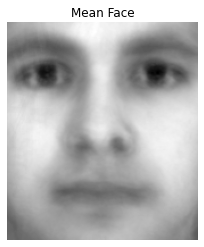

In [11]:
mean_face = np.mean(training_images_stack, axis=1)
print(reader.image_size)
plt.imshow(mean_face.reshape(reader.image_size), cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.show()

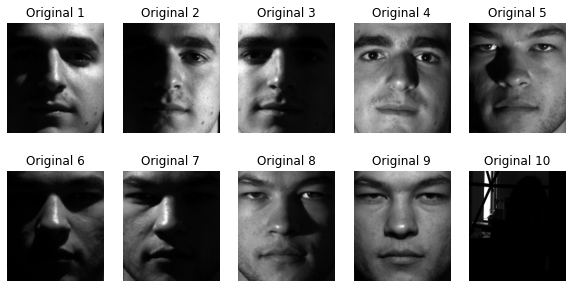

In [13]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(training_images_stack[:,i].reshape(reader.image_size), cmap='gray')
  plt.title('Original {}'.format(i+1))
  plt.axis('off')
plt.show()

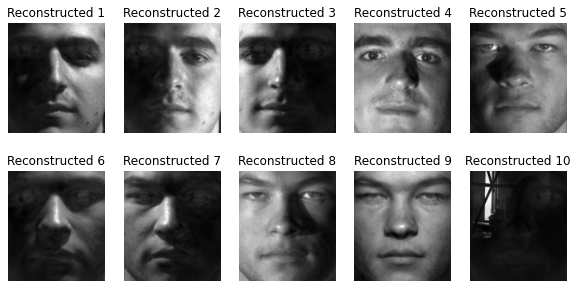

In [14]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(transformed[:,i].reshape(reader.image_size), cmap='gray')
  plt.title('Reconstructed {}'.format(i+1))
  plt.axis('off')
plt.show()

In [15]:
start = perf_counter()
model = EigenFaces(num_components=200)
model(reader.images, reader.labels, num_training=300)
end = perf_counter()

print(f'Training model took {end - start} seconds')

Training model took 29.580745300045237 seconds


In [16]:
cls = model.predict(reader.images[0].flatten())
print(cls, reader.labels[0])

yaleB01 yaleB01
